# Predicting industrial machine downtime 🛠️

###Table of Content

## 1. Introduction

Objective :

Methodology : 

Data :

Summary :

## 2. Librairies & Configurations

### 2.1 Librairies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.3 Configurations

# 3. Data Wrangling

Loading and wrangling the data 

In [2]:
#Loading the dataframe 
df = pd.read_csv('machine_downtime.csv')

In [3]:
#viewing the dataframe
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [4]:
#checking the number of rows and columns in the dataframe
df.shape

(2500, 16)

This data set has 2500 rows and 16 columns consisting of both numeric and categorical features.

# 3.1 Dataset Inspection

The objective is to ensure the accuracy and validity of the data within the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

In [6]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [7]:
# Select object columns
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Downtime'], dtype='object')

In [8]:
# Print unique values for each object columns

In [9]:
for col in object_columns:
    print(f'{col} :  {df[col].unique()}')

Date :  ['31-12-2021' '31-05-2022' '31-03-2022' '31-01-2022' '30-12-2021'
 '30-04-2022' '30-03-2022' '30-01-2022' '29-12-2021' '29-05-2022'
 '29-04-2022' '29-03-2022' '29-01-2022' '28-12-2021' '28-04-2022'
 '28-03-2022' '28-02-2022' '28-01-2022' '27-12-2021' '27-05-2022'
 '27-04-2022' '27-03-2022' '27-02-2022' '27-01-2022' '26-12-2021'
 '26-05-2022' '26-04-2022' '26-03-2022' '26-02-2022' '26-01-2022'
 '25-05-2022' '25-04-2022' '25-03-2022' '25-02-2022' '25-01-2022'
 '24-12-2021' '24-11-2021' '24-05-2022' '24-04-2022' '24-03-2022'
 '24-02-2022' '24-01-2022' '23-05-2022' '23-04-2022' '23-03-2022'
 '23-02-2022' '23-01-2022' '22-12-2021' '22-04-2022' '22-03-2022'
 '22-02-2022' '22-01-2022' '21-12-2021' '21-05-2022' '21-04-2022'
 '21-03-2022' '21-02-2022' '21-01-2022' '20-04-2022' '20-03-2022'
 '20-02-2022' '20-01-2022' '19-06-2022' '19-05-2022' '19-04-2022'
 '19-03-2022' '19-02-2022' '19-01-2022' '18-05-2022' '18-04-2022'
 '18-03-2022' '18-02-2022' '18-01-2022' '17-12-2021' '17-05-2022'
 '

We confirmed that the data presented in the objects is useful; however, we noticed some NaN values and identified opportunities to improve the categorization of the data for a more effective analysis of the dataset.

In [10]:
# Select float columns
float_columns = df.select_dtypes(include=['float']).columns
float_columns

Index(['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature',
       'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object')

In [16]:
# Analyse distributions for floats columns

def plot_float_distributions(dataframe):
    """
    Takes a DataFrame as input and visually displays the distribution
    of all float-type columns.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing float columns.

    Returns:
        None
    """
    # Filter columns of type float
    float_columns = dataframe.select_dtypes(include=['float'])

    if float_columns.empty:
        print("No float-type columns found in the DataFrame.")
        return

    # Initialize the grid for the plots
    num_columns = float_columns.shape[1]
    num_rows = (num_columns + 2) // 3  # 3 plots per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for idx, column in enumerate(float_columns.columns):
        sns.histplot(float_columns[column], kde=True, ax=axes[idx], color="blue")
        axes[idx].set_title(f"Distribution of {column}")
        axes[idx].set_xlabel(column)
        axes[idx].set_ylabel("Frequency")

    # Remove unused axes if the number of columns is not a multiple of 3
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

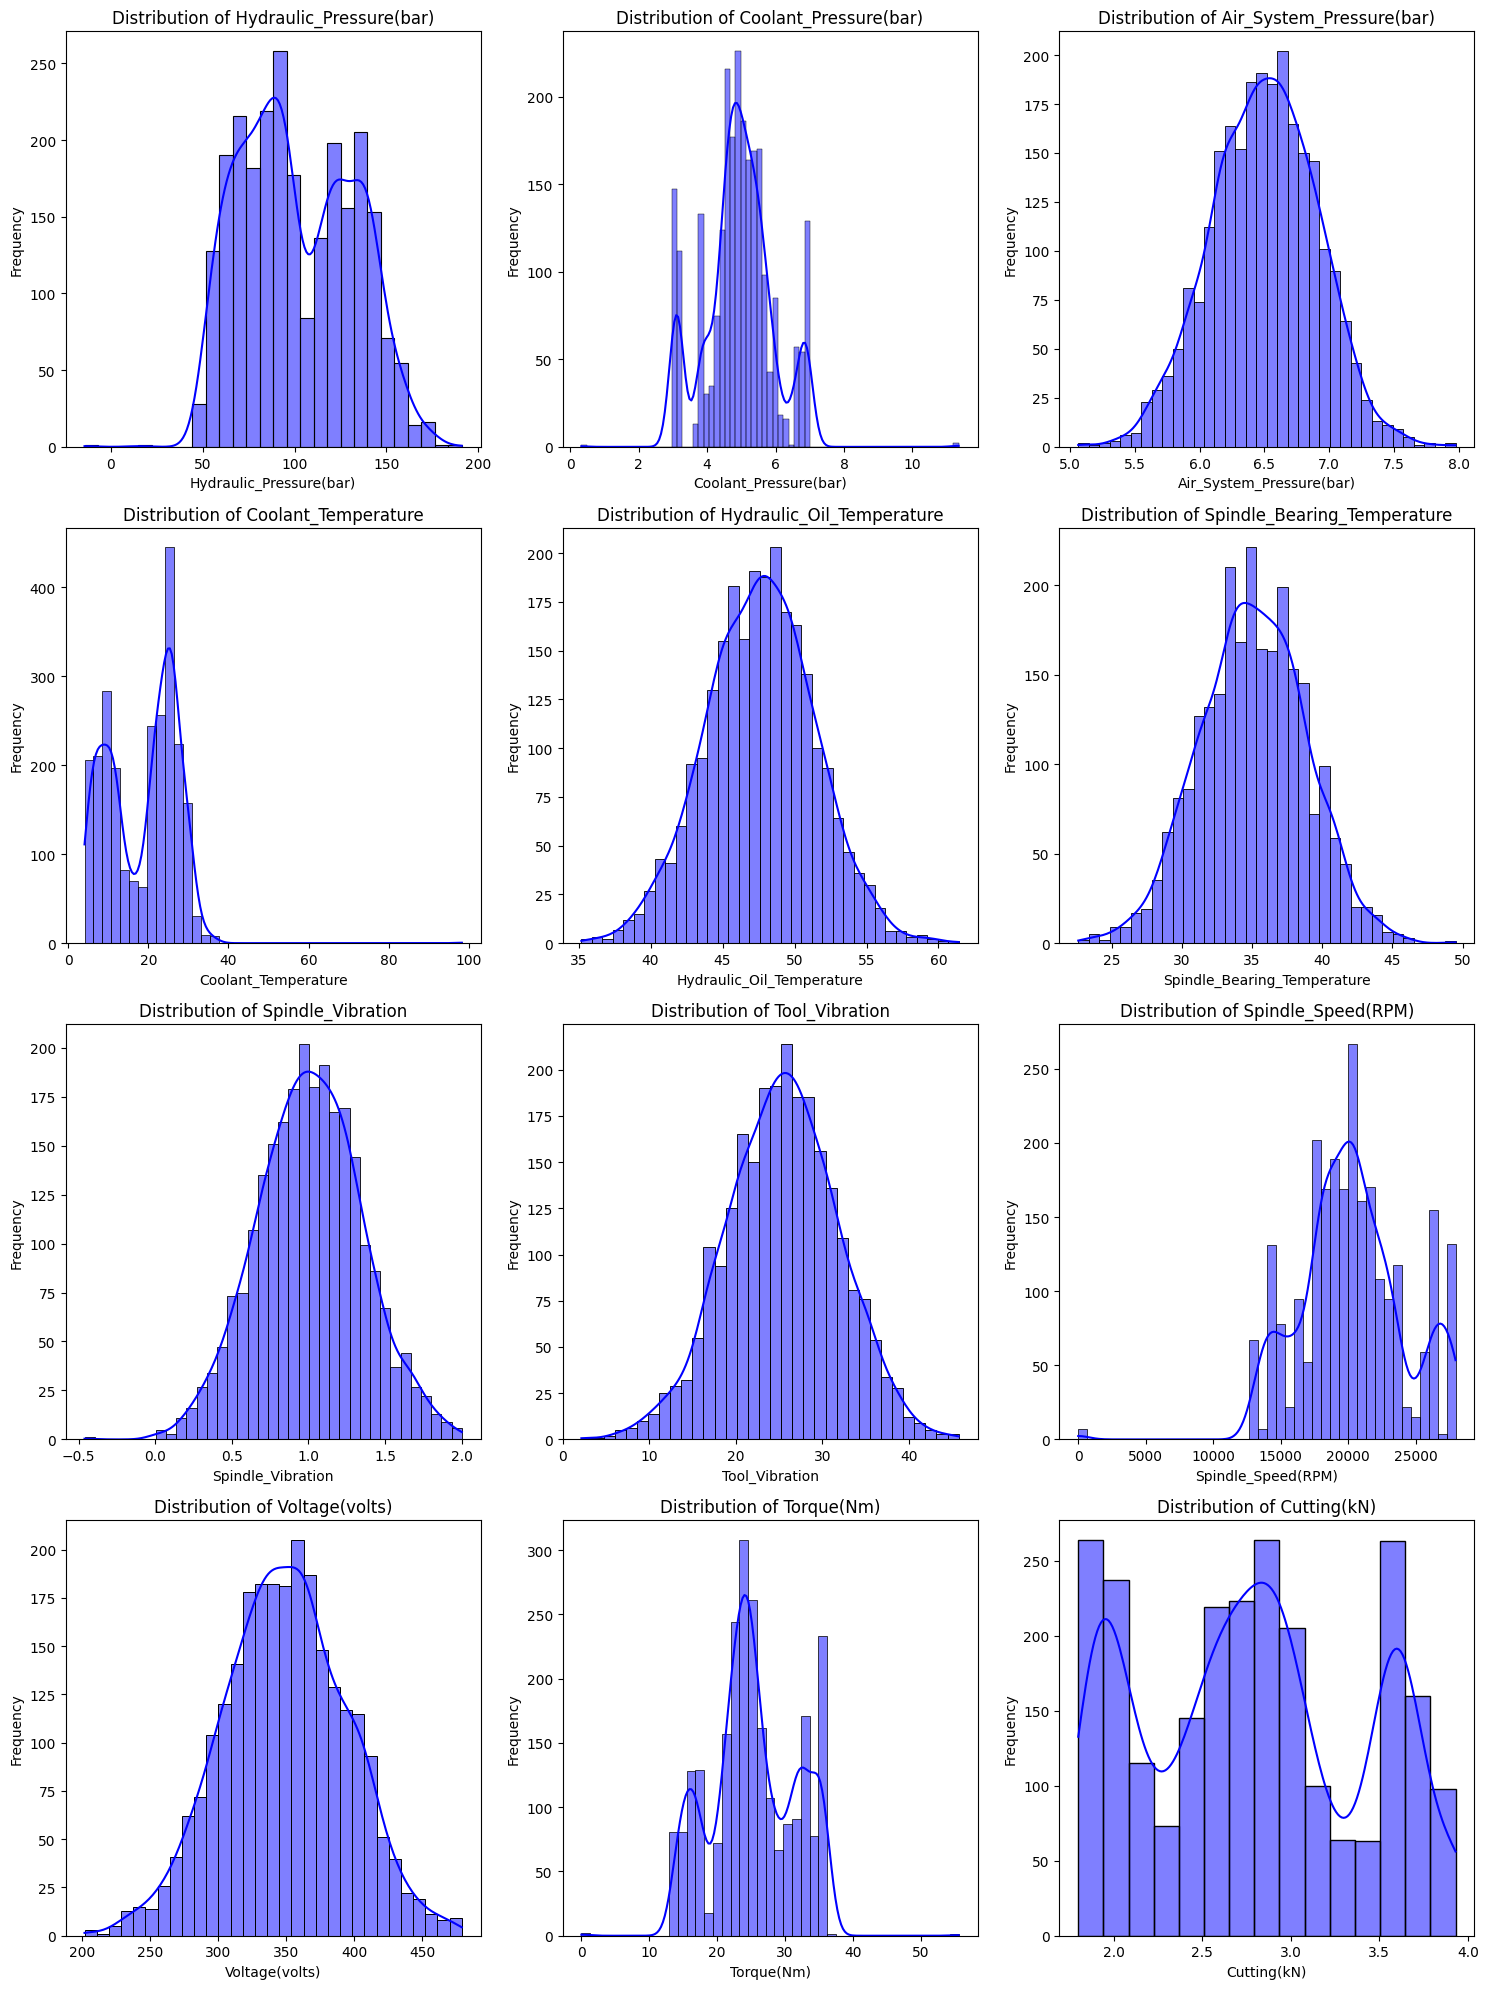

In [17]:
float_distribution = plot_float_distributions(df)

In [28]:
# Analyse outliers for float columns

def plot_float_outliers(dataframe):
    """
    Plot boxplots for all float-type columns in the provided DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """
    # Select columns with float data type
    float_columns = dataframe.select_dtypes(include=['float'])

    if float_columns.empty:
        print("No float-type columns found in the DataFrame.")
        return

    # Set up the grid for the plots
    num_columns = float_columns.shape[1]
    num_rows = (num_columns + 2) // 3  # 3 plots per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for idx, column in enumerate(float_columns.columns):
        sns.boxplot(y=float_columns[column], ax=axes[idx], color="blue")
        axes[idx].set_title(column)
        axes[idx].set_ylabel('Value')

    # Remove unused axes if the number of columns is not a multiple of 3
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

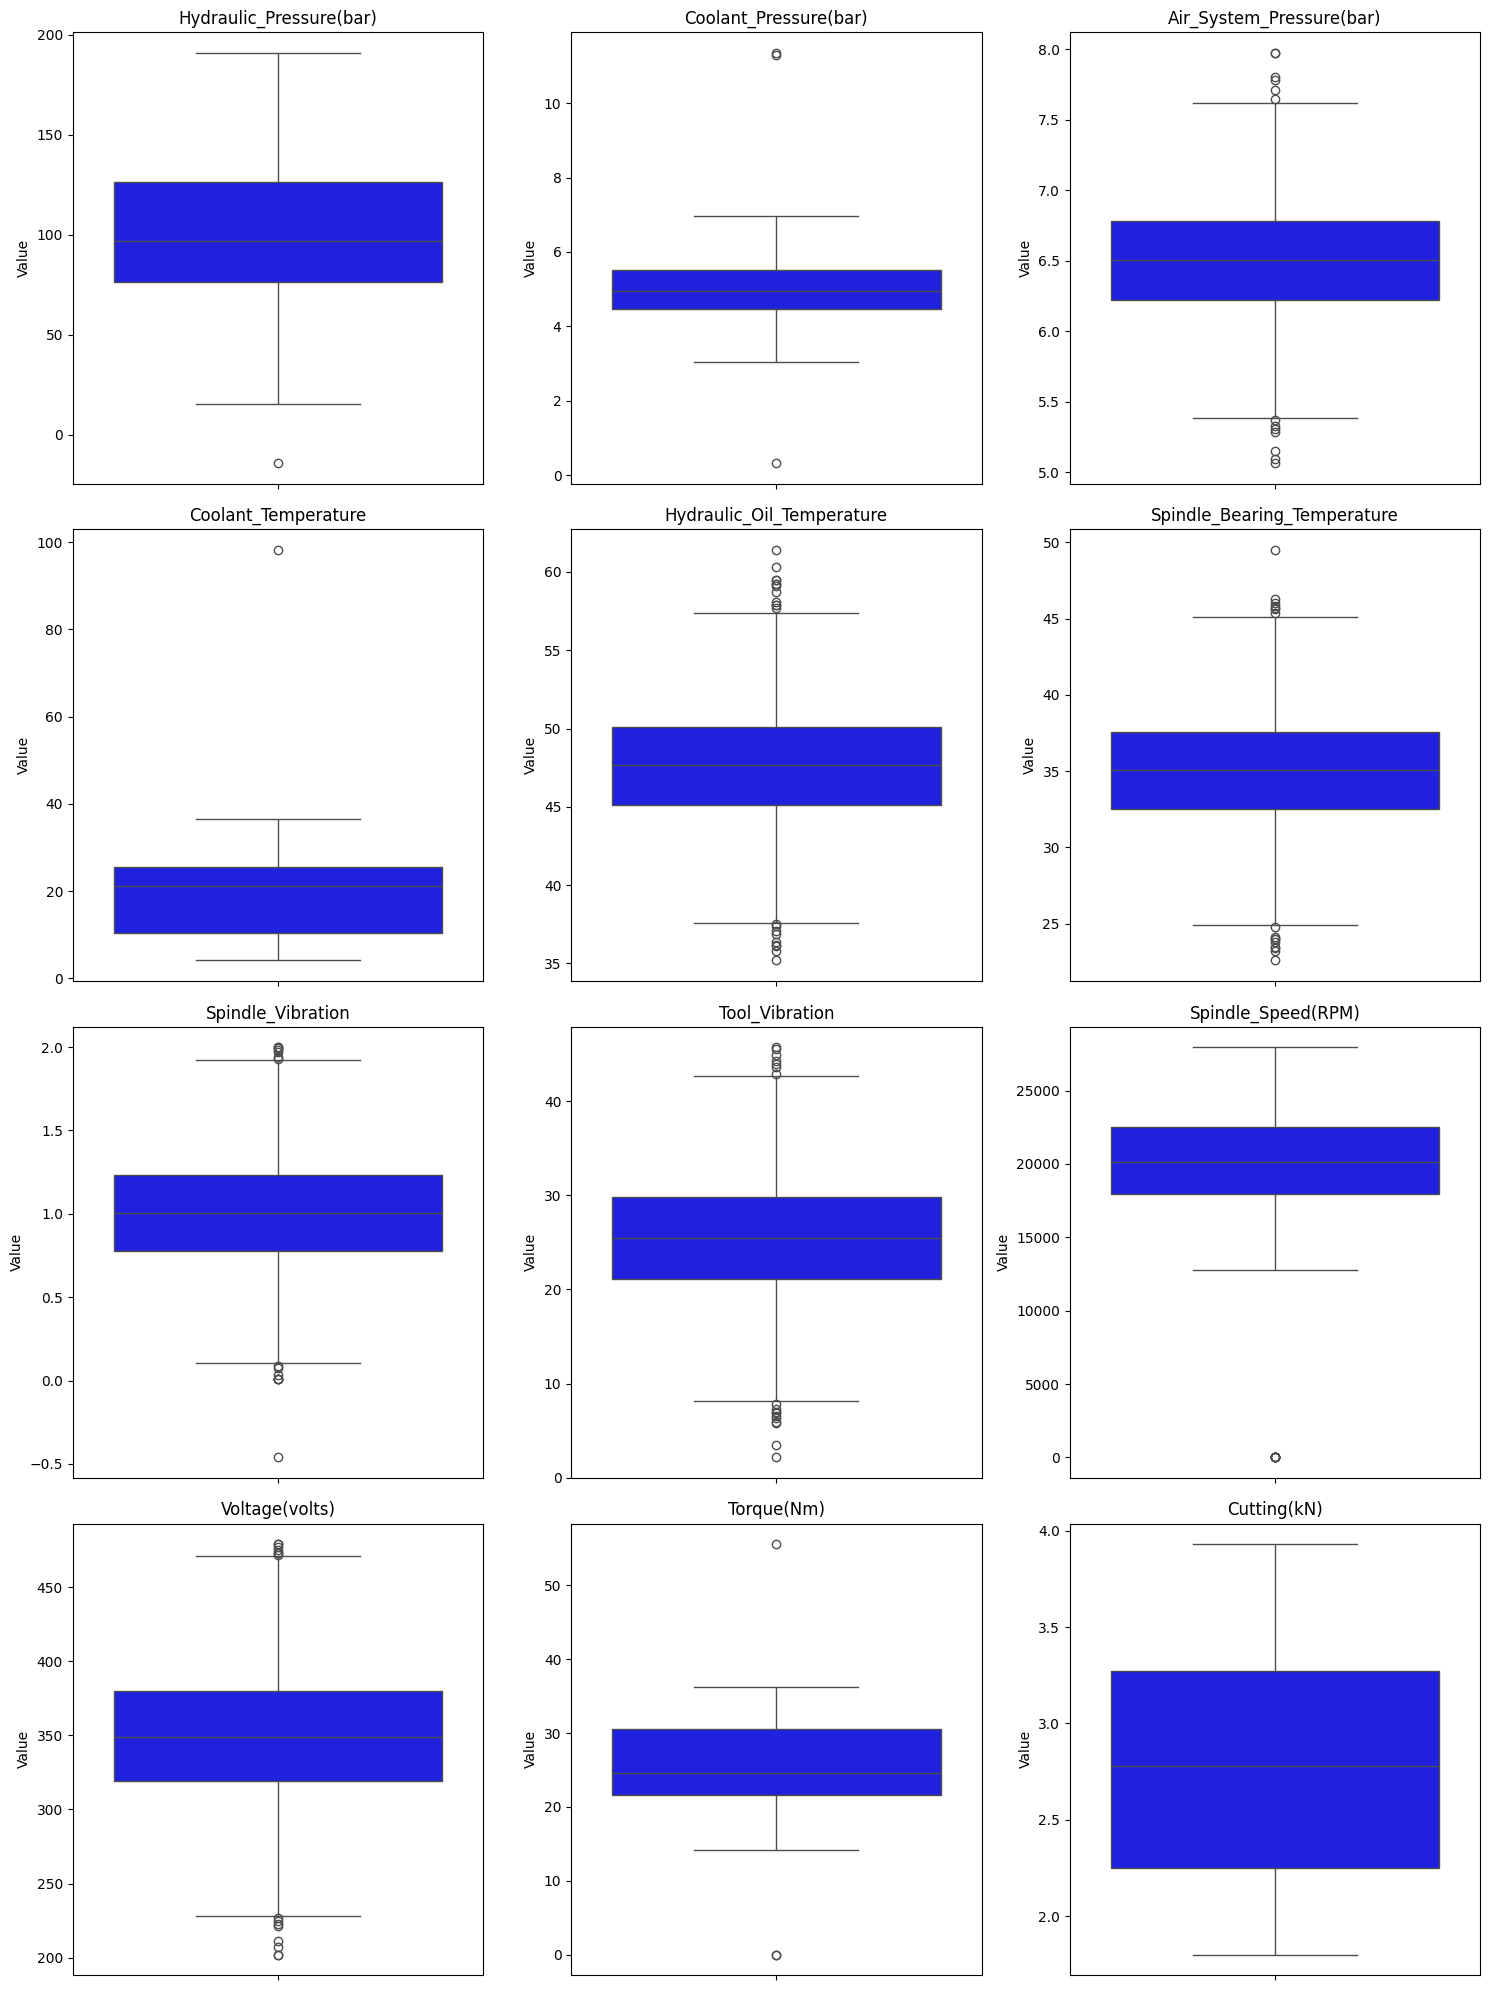

In [29]:
float_outliers = plot_float_outliers(df)

It appears that the majority of the data follows a binomial distribution, with the exception of the coolant temperature, which exhibits a more right-skewed distribution. Regarding outliers, we observe some outliers in each of the categorical variables. At first glance, this is not surprising, considering that machines frequently experience breakdowns. 

# Data Cleaning

# Correlation 

# Time Analysis of downtime 